In [2]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt

tf.device('/gpu:0')
# Dimensiones de nuestras imágenes.
img_width, img_height = 128, 128

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# Directorios de los datos de entrenamiento y validación
train_dir = 'C:/Users/Omar/OneDrive - UNIVERSIDAD DE INGENIERIA Y TECNOLOGIA/Escritorio/VCICLO/MACHINE LEARNING/tt111'
test_dir = 'C:/Users/Omar/OneDrive - UNIVERSIDAD DE INGENIERIA Y TECNOLOGIA/Escritorio/VCICLO/MACHINE LEARNING/tt222'

batch_size = 32

In [7]:
def count_files_in_subfolders(directory):
    """ Cuenta el número de archivos en cada subcarpeta de un directorio dado. """
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)
        if os.path.isdir(subfolder_path):
            total_files = len([file for file in os.listdir(subfolder_path) 
                               if os.path.isfile(os.path.join(subfolder_path, file))])
            print(f"Total de archivos en '{subfolder}': {total_files}")

# Contar los archivos en las subcarpetas de cada directorio
print("Contando archivos en el directorio de entrenamiento:")
count_files_in_subfolders(train_dir)

print("\nContando archivos en el directorio de prueba:")
count_files_in_subfolders(test_dir)

Contando archivos en el directorio de entrenamiento:
Total de archivos en 'angry': 3993
Total de archivos en 'disgust': 436
Total de archivos en 'fear': 4103
Total de archivos en 'happy': 7164
Total de archivos en 'neutral': 4982
Total de archivos en 'sad': 4938
Total de archivos en 'surprise': 3205

Contando archivos en el directorio de prueba:
Total de archivos en 'angry': 960
Total de archivos en 'disgust': 111
Total de archivos en 'fear': 1018
Total de archivos en 'happy': 1825
Total de archivos en 'neutral': 1216
Total de archivos en 'sad': 1139
Total de archivos en 'surprise': 797


In [1]:
# Ajustar la forma de entrada dependiendo de la configuración de los canales
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\Omar\anaconda3\envs\entornoGPU\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Omar\AppData\Local\Temp\ipykernel_22792\171181190.py", line 2, in <module>
    if K.image_data_format() == 'channels_first':
NameError: name 'K' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Omar\anaconda3\envs\entornoGPU\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Omar\anaconda3\envs\entornoGPU\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, numbe

In [9]:
# Creación del modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))  # Cambia el número de neuronas aquí para que coincida con el número de actores/clases
model.add(Activation('softmax'))  # Cambia 'sigmoid' por 'softmax' para clasificación multiclase
# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)      

In [10]:
# Compilación del modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    epochs=10,  # Establece el número de épocas que desees
    validation_data=validation_generator)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/10
901/901 [==============================] - 396s 439ms/step - loss: 1.7834 - accuracy: 0.2669 - val_loss: 1.6796 - val_accuracy: 0.3568
Epoch 2/10
901/901 [==============================] - 371s 411ms/step - loss: 1.6577 - accuracy: 0.3385 - val_loss: 1.5560 - val_accuracy: 0.4250
Epoch 3/10
901/901 [==============================] - 103s 115ms/step - loss: 1.5616 - accuracy: 0.3846 - val_loss: 1.6543 - val_accuracy: 0.4597
Epoch 4/10
901/901 [==============================] - 261s 289ms/step - loss: 1.5032 - accuracy: 0.4101 - val_loss: 1.1398 - val_accuracy: 0.4611
Epoch 5/10
901/901 [==============================] - 228s 253ms/step - loss: 1.4607 - accuracy: 0.4310 - val_loss: 1.3238 - val_accuracy: 0.4820
Epoch 6/10
901/901 [==============================] - 107s 119ms/step - loss: 1.4374 - accuracy: 0.4422 - val_loss: 1.2812 - val_accuracy: 0.5000
Epoch 7/10
901/901 [===================

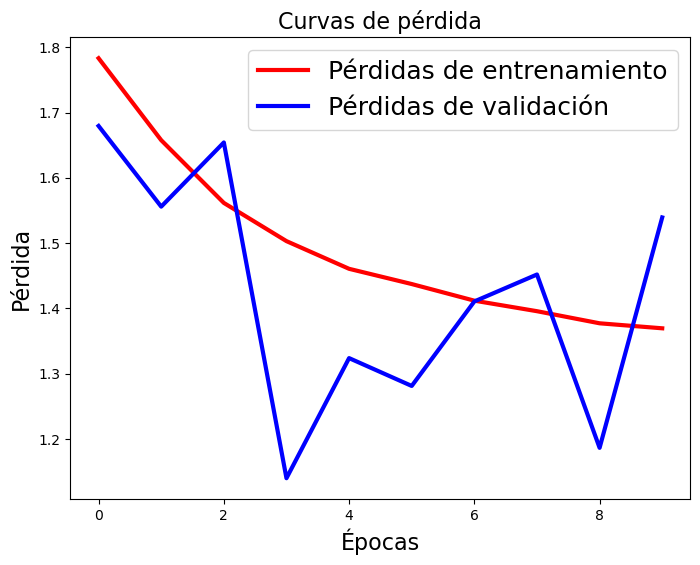

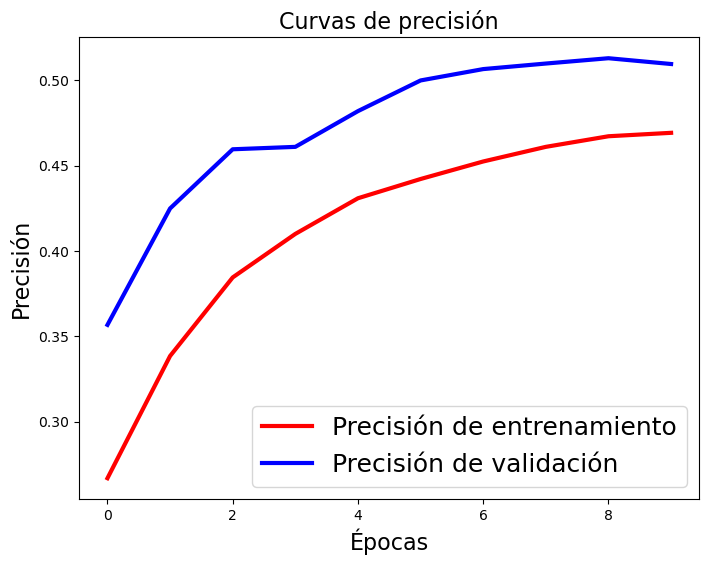

In [12]:
# Graficar las curvas de pérdida y precisión
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Pérdidas de entrenamiento', 'Pérdidas de validación'], fontsize=18)
plt.xlabel('Épocas', fontsize=16)
plt.ylabel('Pérdida', fontsize=16)
plt.title('Curvas de pérdida', fontsize=16)
plt.show()

plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
plt.legend(['Precisión de entrenamiento', 'Precisión de validación'], fontsize=18)
plt.xlabel('Épocas', fontsize=16)
plt.ylabel('Precisión', fontsize=16)
plt.title('Curvas de precisión', fontsize=16)
plt.show()